In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,LabelBinarizer,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures,Binarizer,KBinsDiscretizer,PowerTransformer
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline


In [2]:
x = np.array(["chat","chien","chat","oiseau"])

In [3]:
transformer = LabelEncoder()
transformer.fit(x)


LabelEncoder()

In [4]:
transformer.transform(x)

array([0, 1, 0, 2])

In [5]:
transformer.fit_transform(x)

array([0, 1, 0, 2])

In [6]:
y = np.array(["chat","chien","chat","oiseau"])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [7]:
encoder.inverse_transform(np.array([0,0,0,2,2]))

array(['chat', 'chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [8]:
x = np.array([["Chat","Poils"],
             ["Chien","Poils"],
             ["Chat","Poils"],
             ["Oiseau","Plume"]])

encoder = OrdinalEncoder()
encoder.fit_transform(x)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [9]:
y = np.array(["chat","chien","chat","oiseau"])

encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [10]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [11]:
x = np.array([["Chat","Poils"],
             ["Chien","Poils"],
             ["Chat","Poils"],
             ["Oiseau","Plume"]])

encoder = OneHotEncoder()
encoder.fit_transform(x)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
x = np.array([[70],
             [80],
             [120]])

In [13]:
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0. ],
       [0.2],
       [1. ]])

In [14]:
x_test = np.array([[90]])

scaler.transform(x_test)

array([[0.4]])

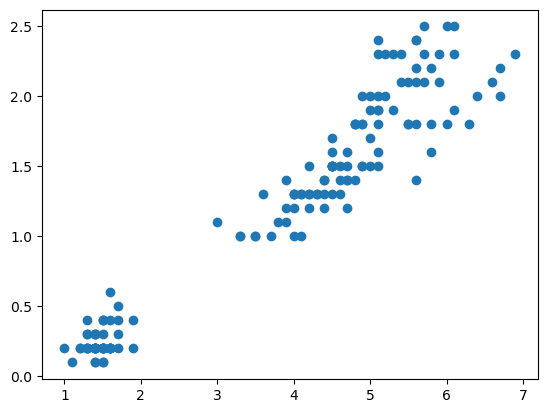

In [15]:
iris = load_iris()
x = iris.data

plt.scatter(x[:,2],x[:,3])
plt.show()

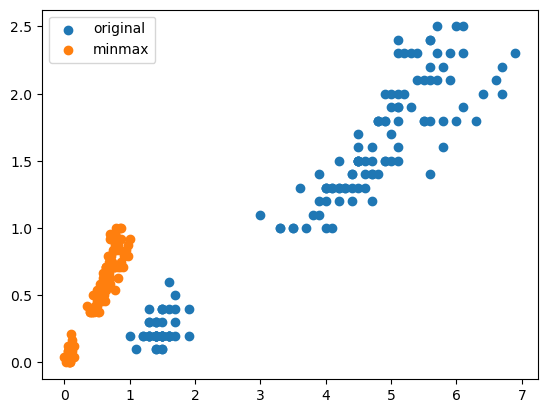

In [16]:
x_minmax = MinMaxScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3], label = "original")
plt.scatter(x_minmax[:,2],x_minmax[:,3], label = "minmax")
plt.legend()
plt.show()

In [17]:
x = np.array([[70],
             [80],
             [120]])

In [18]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

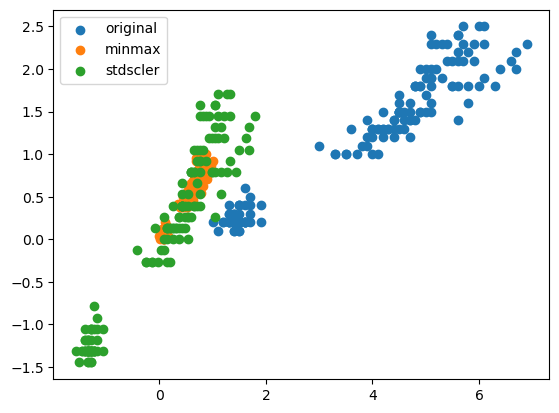

In [19]:
x = iris.data
x_minmax = MinMaxScaler().fit_transform(x)
x_stdscl = StandardScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3], label = "original")
plt.scatter(x_minmax[:,2],x_minmax[:,3], label = "minmax")
plt.scatter(x_stdscl[:,2],x_stdscl[:,3], label = "stdscler")
plt.legend()
plt.show()

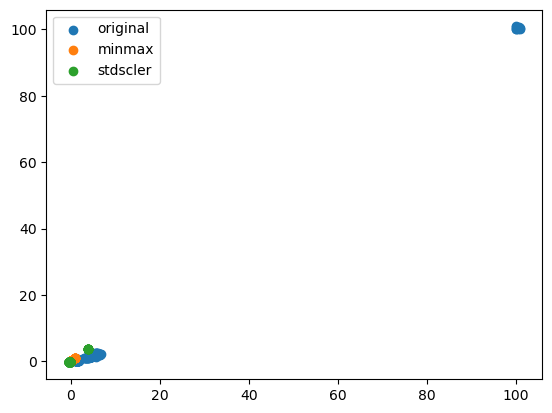

In [20]:
x = iris.data
outliers = np.full((10,4),100) + np.random.rand(10,4)
x = np.vstack((x,outliers))
x_minmax = MinMaxScaler().fit_transform(x)
x_stdscl = StandardScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3], label = "original")
plt.scatter(x_minmax[:,2],x_minmax[:,3], label = "minmax")
plt.scatter(x_stdscl[:,2],x_stdscl[:,3], label = "stdscler")
plt.legend()
plt.show()

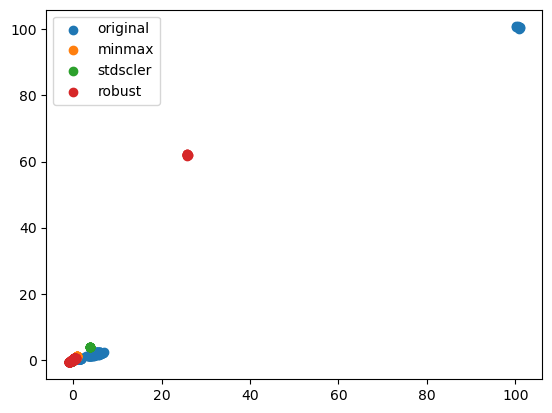

In [21]:
x = iris.data
outliers = np.full((10,4),100) + np.random.rand(10,4)
x = np.vstack((x,outliers))
x_minmax = MinMaxScaler().fit_transform(x)
x_stdscl = StandardScaler().fit_transform(x)
x_robust = RobustScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3], label = "original")
plt.scatter(x_minmax[:,2],x_minmax[:,3], label = "minmax")
plt.scatter(x_stdscl[:,2],x_stdscl[:,3], label = "stdscler")
plt.scatter(x_robust[:,2],x_robust[:,3], label = "robust")
plt.legend()
plt.show()

In [22]:
x = np.array([[1],
              [2],
              [0.5]])

PolynomialFeatures(3).fit_transform(x)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

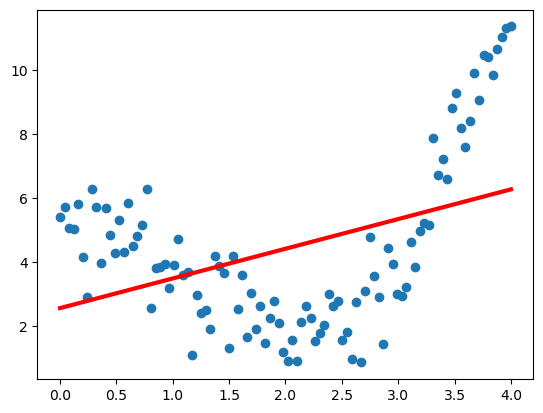

In [23]:
x = np.linspace(0, 4, 100).reshape(100, 1)

y = x**2 + 5*np.cos(x) + np.random.randn(100,1)

plt.scatter(x,y)

model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

plt.plot(x,y_pred,c="r",lw = 3)

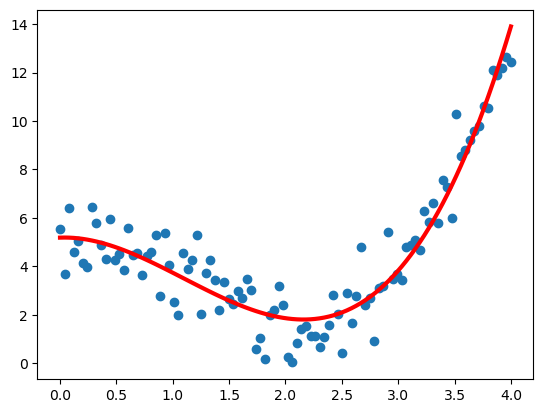

In [24]:
x = np.linspace(0, 4, 100).reshape(100, 1)

y = x**2 + 5*np.cos(x) + np.random.randn(100,1)

x_poly = PolynomialFeatures(3).fit_transform(x)

plt.scatter(x,y)

model = LinearRegression().fit(x_poly,y)
y_pred = model.predict(x_poly)

plt.plot(x,y_pred,c="r",lw = 3)

In [25]:
x = np.linspace(0,5,10).reshape(10,1)
x

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [26]:
np.hstack((x,Binarizer(threshold=3).fit_transform(x)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [27]:
KBinsDiscretizer(n_bins=6).fit_transform(x).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [28]:
iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train)

model = SGDClassifier(random_state= 0)
model.fit(x_train_transformed,y_train)

x_test_transformed = scaler.transform(x_test)
model.predict(x_test_transformed)

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [30]:
model = make_pipeline(StandardScaler(),SGDClassifier())
model.fit(x_train,y_train)
model.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0])

In [31]:
model = make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [32]:
params ={
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__penalty':['l1','l2']
}

grid = GridSearchCV(model,param_grid=params,cv=4)
grid.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [33]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l1'}

In [34]:
grid.score(x_test,y_test)

0.9666666666666667

# Bonus transformation des données pour une distributions normal ou gaussienne

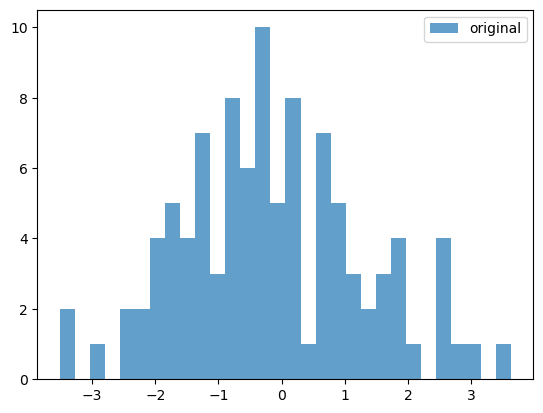

In [35]:
np.random.seed(0)
x = np.random.randn(100,2) + np.random.randn(100,2)


plt.hist(x[:,0],bins = 30, alpha=0.7,label="original")

plt.legend()
plt.show()

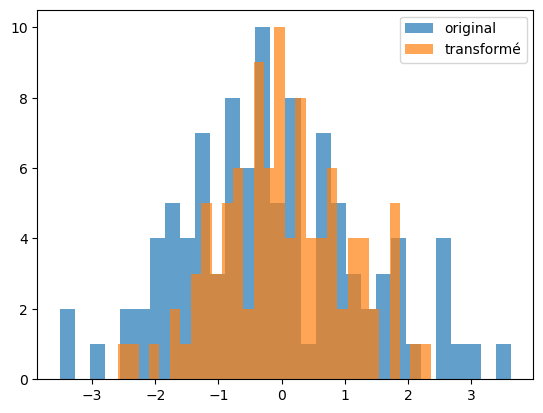

In [36]:
np.random.seed(0)
x = np.random.randn(100,2) + np.random.randn(100,2)
x2 = PowerTransformer().fit_transform(x)

plt.hist(x[:,0],bins = 30, alpha=0.7,label="original")
plt.hist(x2[:,0],bins = 30, alpha=0.7,label="transformé")
plt.legend()
plt.show()